Import Libraries

In [1]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

Create Log variable

In [2]:
log = xes_importer.apply('../dataset/Road_Traffic_Fine_Management_Process.xes')

/home/stas/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:24<00:00, 6112.94it/s]


Apply the alpha miner alg

In [55]:
net, initial_marking, final_marking = alpha_miner.apply(log)

Visualize the resulting petri net

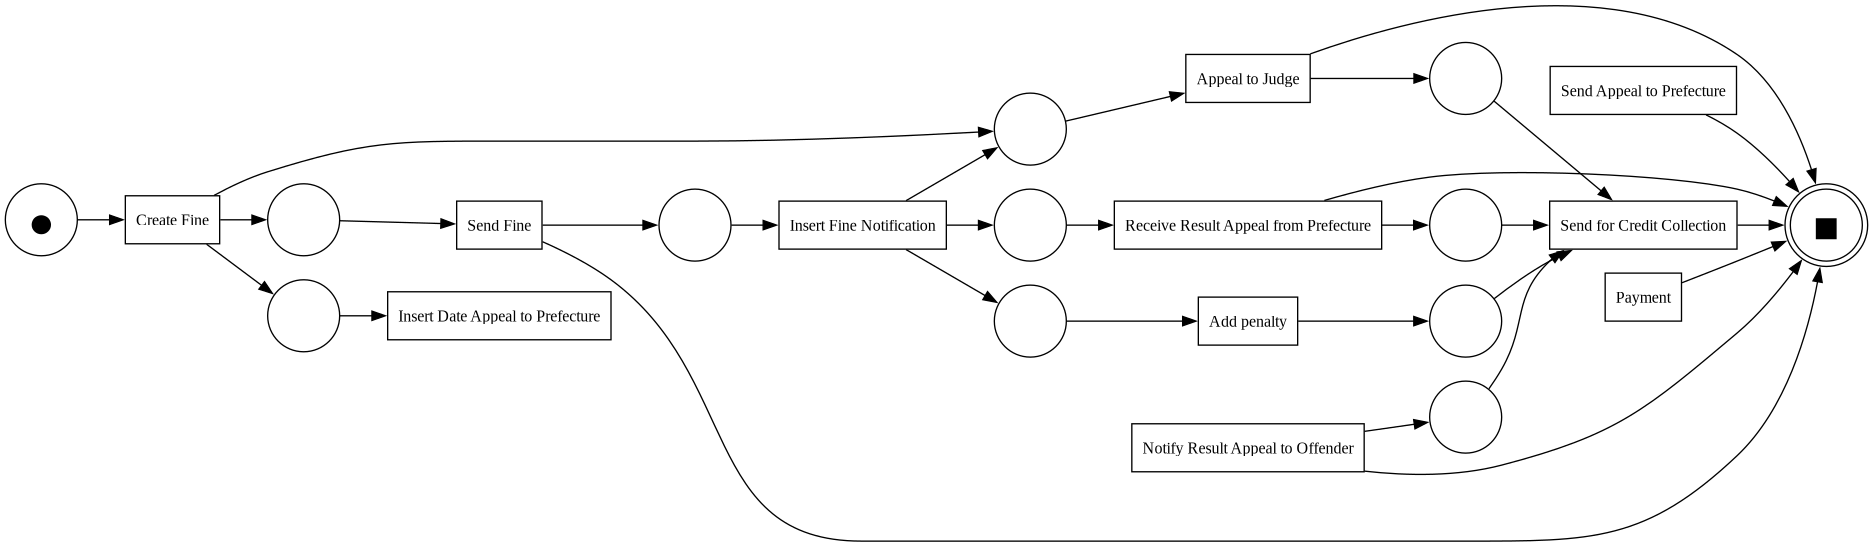

In [56]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

Apply the heuristic miner alg

In [51]:
heu_net = heuristics_miner.apply_heu(log)

Visualize the model

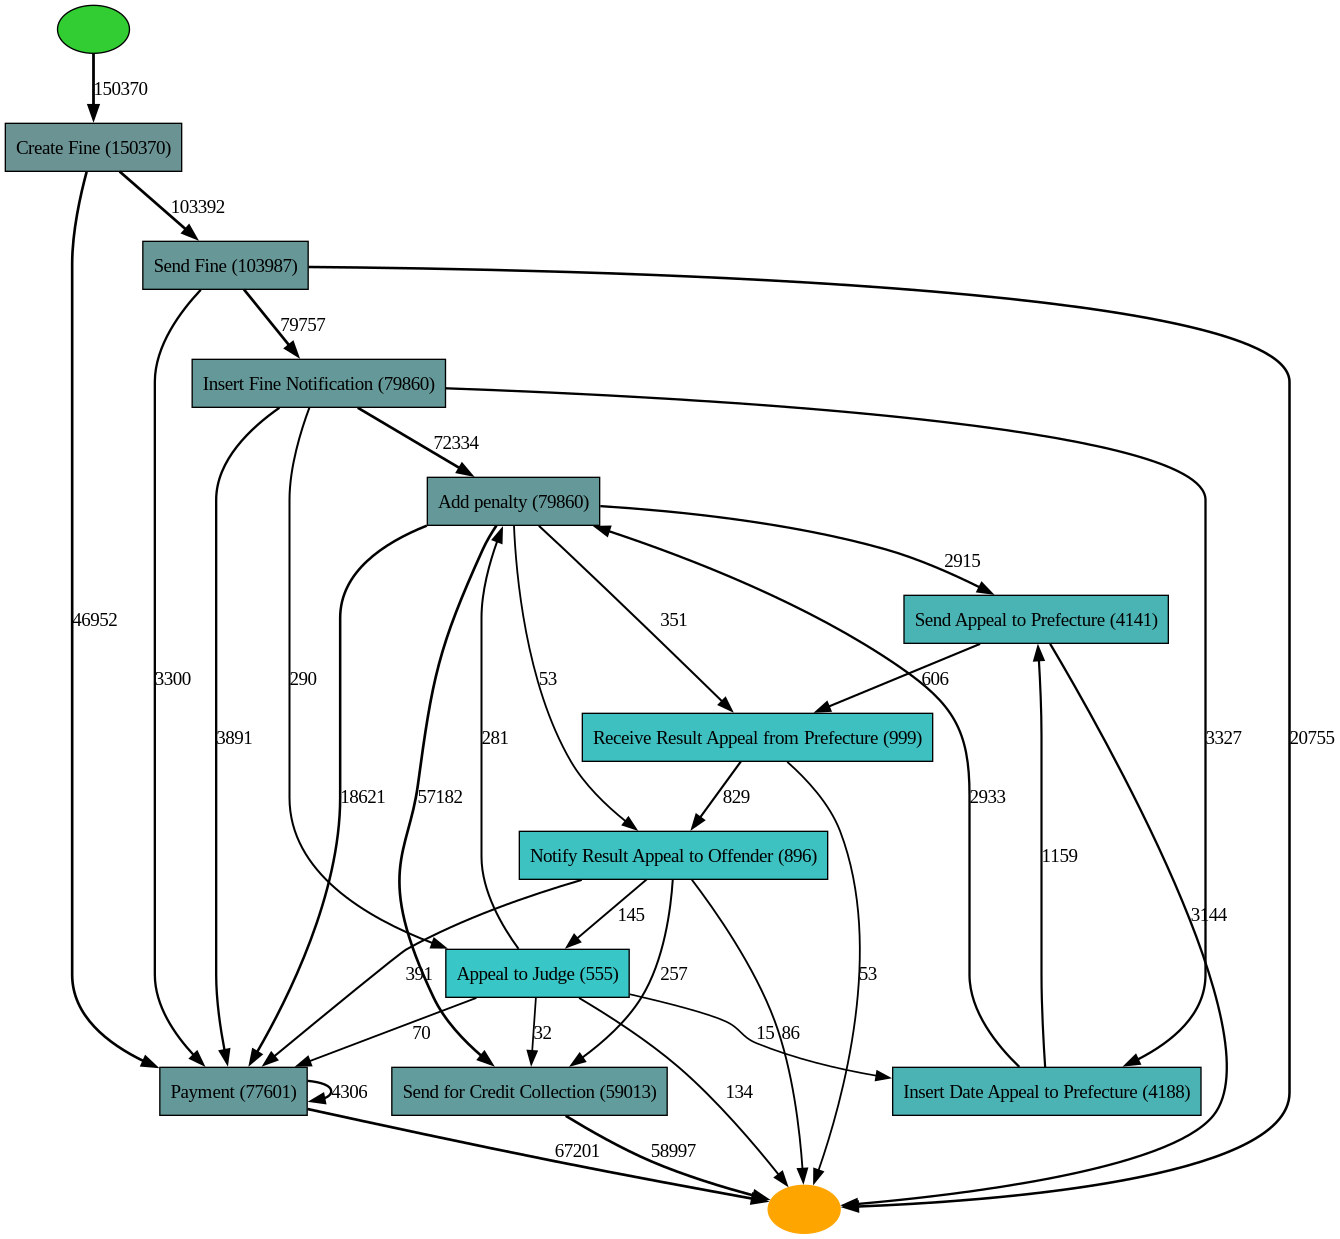

In [52]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)